In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv')

In [5]:
print(test.shape)

(10000, 785)


In [6]:
print(train.shape)

(60000, 785)


In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(train.isna().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [10]:
print(test.isna().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [11]:
item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

<ipython-input-12-2c102c8900a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train, x='label', palette=['#333333'])
<ipython-input-12-2c102c8900a2>:4: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(train, x='label', palette=['#333333'])
<ipython-input-12-2c102c8900a2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(test,x='label',palette=['#fb0203'])
<ipython-input-12-2c102c8900a2>:9: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(test,x='label',palette=['#fb0203'])


[]

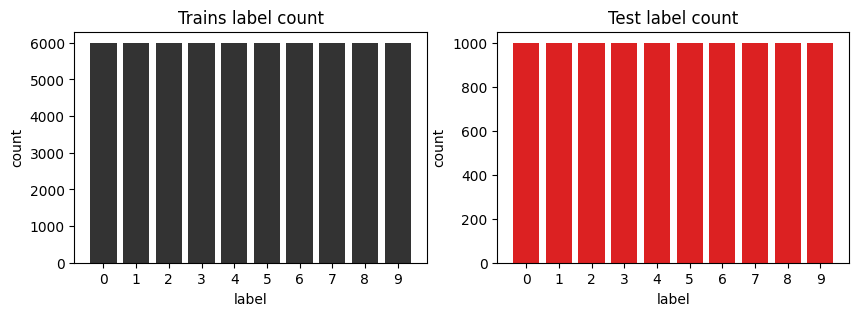

In [12]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.countplot(train, x='label', palette=['#333333'])
plt.title("Trains label count")
plt.plot()

plt.subplot(1,2,2)
sns.countplot(test,x='label',palette=['#fb0203'])
plt.title('Test label count')
plt.plot()


<ipython-input-13-4e27a9354d36>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


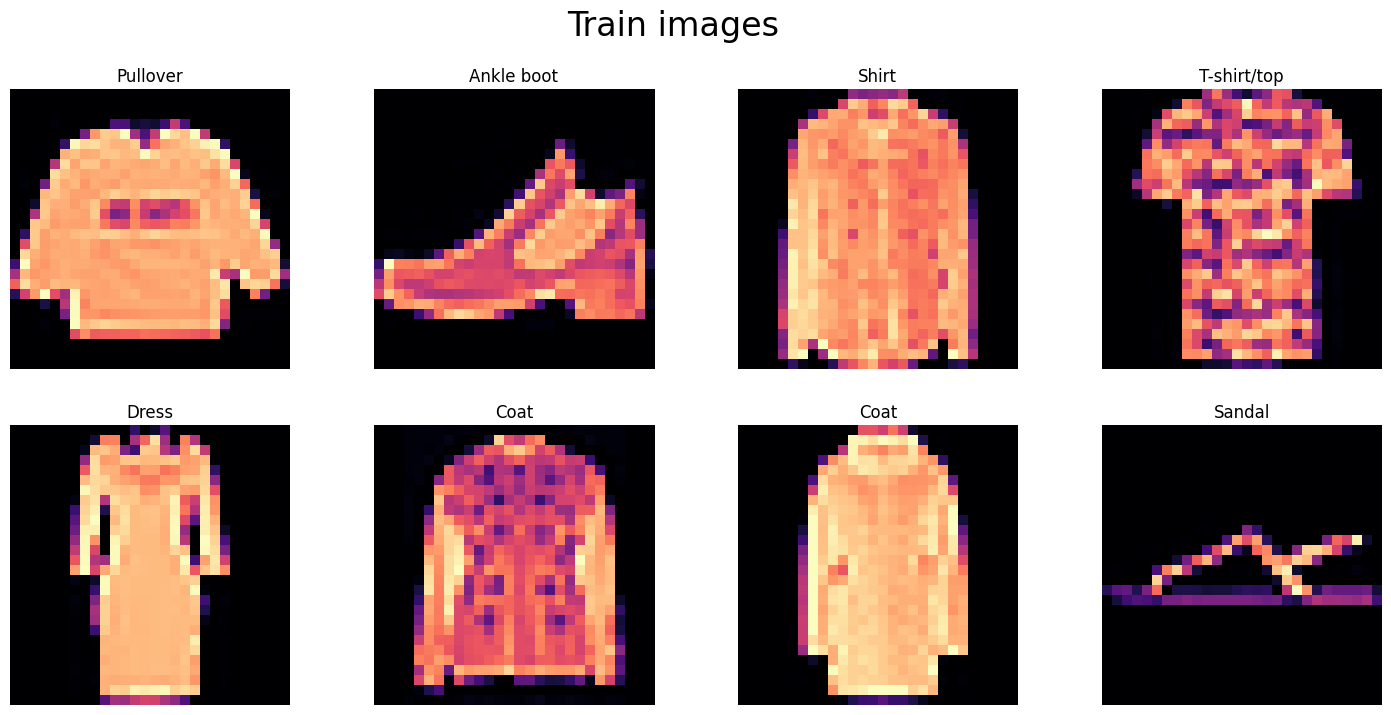

In [13]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

<ipython-input-14-a54292fbcaca>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


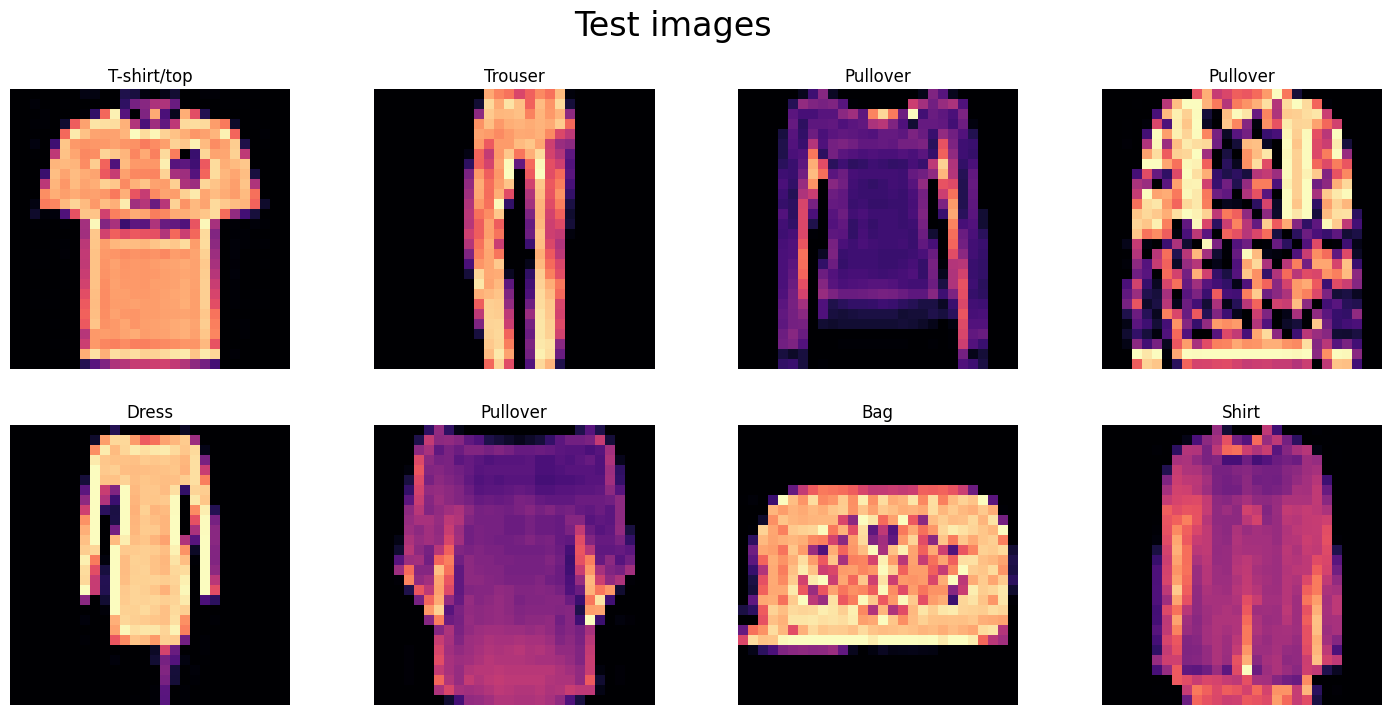

In [14]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense, Flatten,Dropout

In [16]:
X_train = train.iloc[:, 1:].to_numpy()
y_train = train['label'].to_numpy()

X_test = test.iloc[:, 1:].to_numpy()
y_test = test['label'].to_numpy()

for i in [X_train,y_train,X_test,y_test]:
  print(i.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [17]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
y_train_enc = to_categorical(y_train,num_classes=10)
y_test_enc = to_categorical(y_test,num_classes=10)

In [20]:
for i in [X_train, y_train_enc, X_test, y_test_enc]:
  print(i.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [21]:
X_train,X_val,y_train_enc,y_val_enc = train_test_split(X_train,y_train_enc,test_size=0.3)
for i in [X_train,y_train_enc,X_val,y_val_enc]:
  print(i.shape)

(42000, 28, 28, 1)
(42000, 10)
(18000, 28, 28, 1)
(18000, 10)


In [22]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu',input_shape = INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [27]:
history = model.fit(X_train,y_train_enc,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=VERBOSE,validation_split=0.3)

Epoch 1/10
230/230 - 26s - loss: 1.2003 - accuracy: 0.6708 - val_loss: 0.4812 - val_accuracy: 0.8216 - 26s/epoch - 113ms/step
Epoch 2/10
230/230 - 24s - loss: 0.5376 - accuracy: 0.8034 - val_loss: 0.4309 - val_accuracy: 0.8489 - 24s/epoch - 102ms/step
Epoch 3/10
230/230 - 21s - loss: 0.4534 - accuracy: 0.8369 - val_loss: 0.3800 - val_accuracy: 0.8602 - 21s/epoch - 93ms/step
Epoch 4/10
230/230 - 24s - loss: 0.4062 - accuracy: 0.8542 - val_loss: 0.3533 - val_accuracy: 0.8740 - 24s/epoch - 105ms/step
Epoch 5/10
230/230 - 22s - loss: 0.3673 - accuracy: 0.8676 - val_loss: 0.3523 - val_accuracy: 0.8702 - 22s/epoch - 94ms/step
Epoch 6/10
230/230 - 25s - loss: 0.3339 - accuracy: 0.8760 - val_loss: 0.3301 - val_accuracy: 0.8811 - 25s/epoch - 107ms/step
Epoch 7/10
230/230 - 22s - loss: 0.3169 - accuracy: 0.8858 - val_loss: 0.3266 - val_accuracy: 0.8833 - 22s/epoch - 94ms/step
Epoch 8/10
230/230 - 25s - loss: 0.2973 - accuracy: 0.8920 - val_loss: 0.3234 - val_accuracy: 0.8841 - 25s/epoch - 111ms/

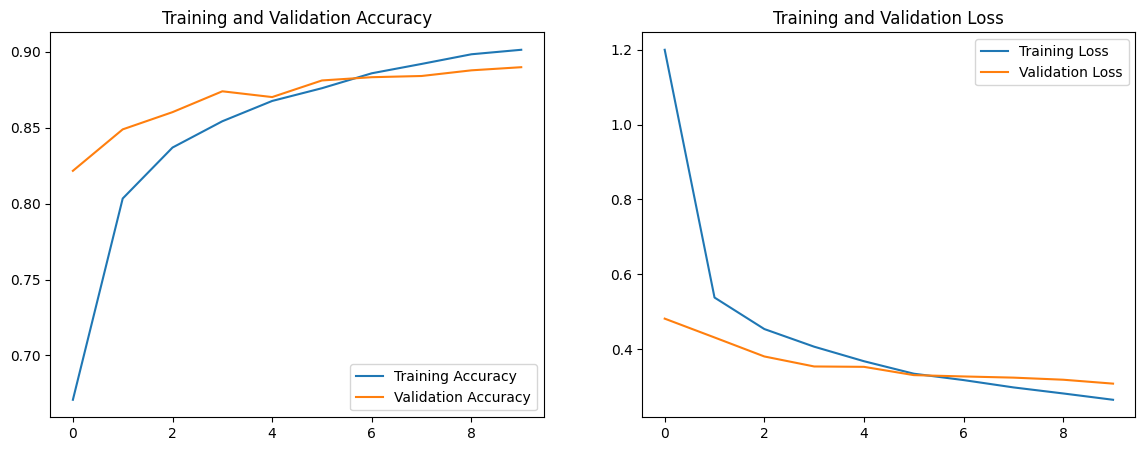

In [29]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
model.evaluate(X_val, y_val_enc)

563/563 [==============================] - 7s 12ms/step - loss: 0.3116 - accuracy: 0.8863


[0.31164562702178955, 0.8862777948379517]

In [32]:
y_pred_enc = model.predict(X_test)

y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 3s 11ms/step
[9.8373610e-01 1.3159154e-05 2.6691720e-04 8.1658206e-04 3.4353823e-05
 2.9745173e-08 1.5131534e-02 9.5934567e-08 1.1168620e-06 3.7808903e-08]
0


<ipython-input-33-3218bb416626>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,ind+1)


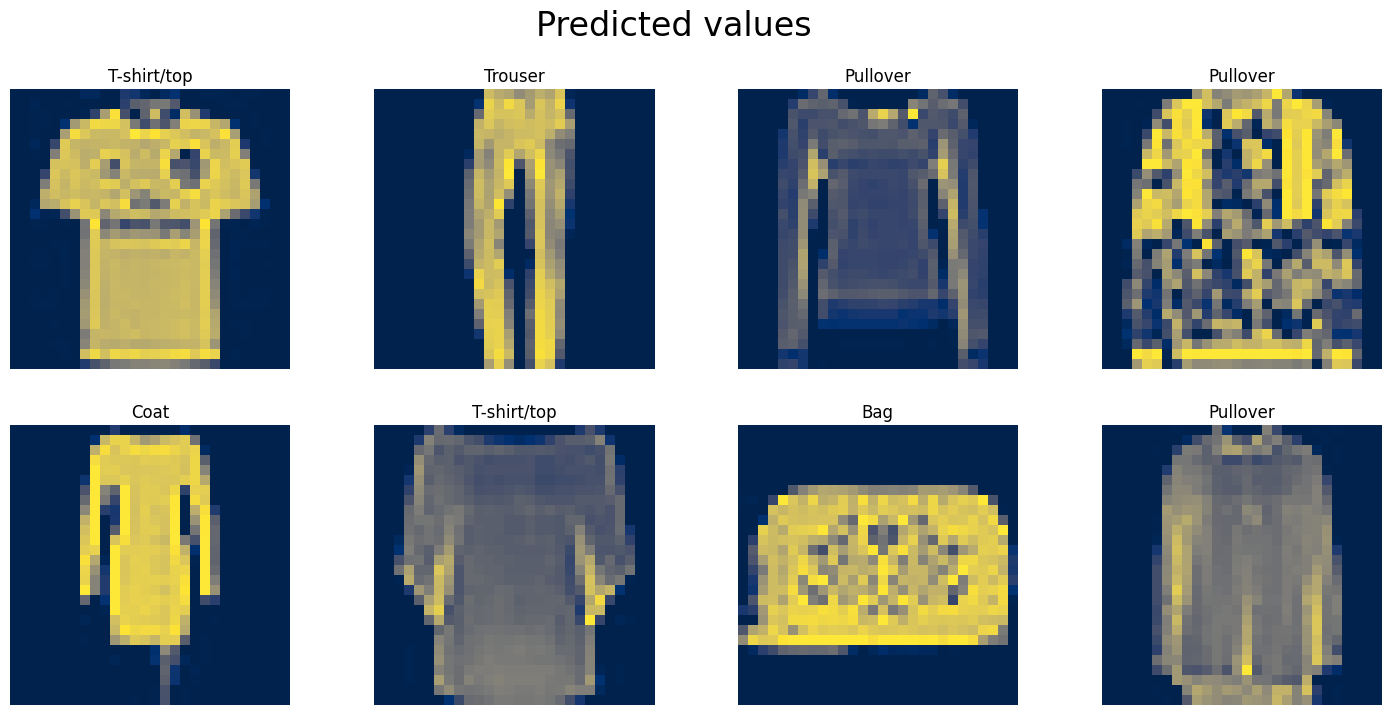

In [33]:
fig,ax = plt.subplots(figsize=(18,8))
for ind, row in  enumerate(X_test[:8]):
  plt.subplot(2,4,ind+1)
  plt.title(item[y_pred[ind]])
  img = row.reshape(28,28)
  fig.suptitle('Predicted values',fontsize=24)
  plt.axis('off')
  plt.imshow(img, cmap='cividis')

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.79      0.83      1000
           3       0.91      0.92      0.91      1000
           4       0.79      0.88      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.77      0.57      0.65      1000
           7       0.96      0.95      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



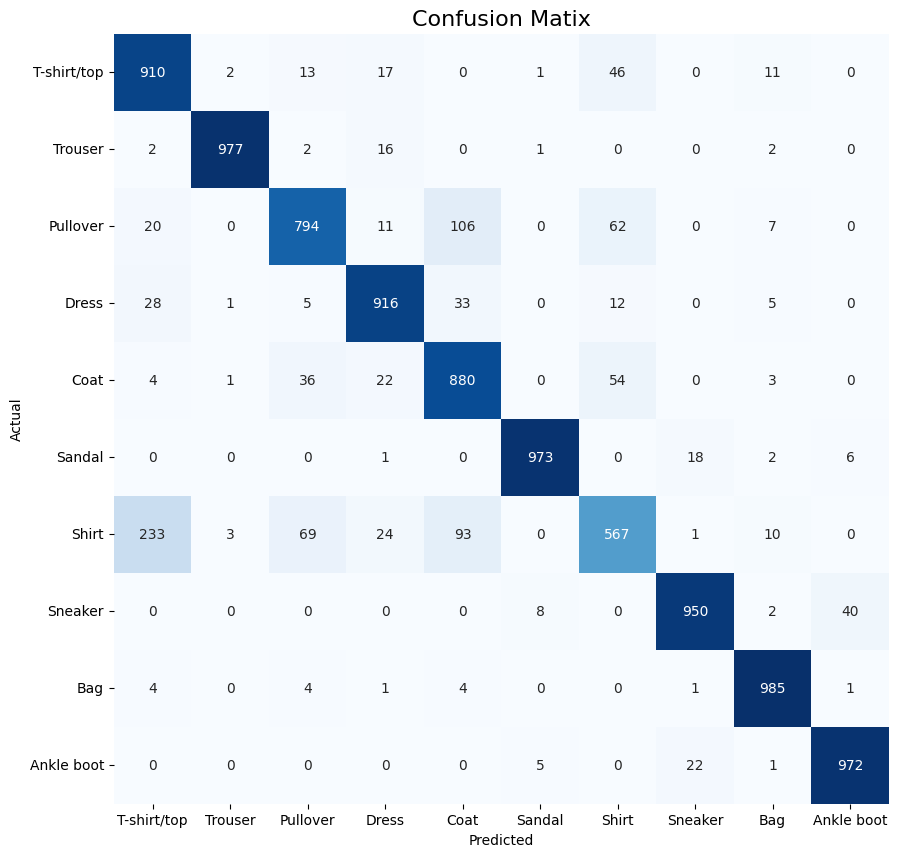

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,fmt='1d',cmap='Blues',ax=ax)
ax.set_title('Confusion Matix',loc='center',fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(item.values())
ax.set_yticklabels(item.values(),rotation=0)
plt.show()